In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/savio/miniconda3/envs/env01/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/savio/miniconda3/envs/env01/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/savio/miniconda3/envs/env01/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 1 Leia os dados train.csv usando pandas

In [31]:
!ls

carros.csv     College_Exercices.ipynb	Exercicios_carros.ipynb  pyplot.ipynb
Cilindors.csv  df_titan.csv		Exercicio_Titanic.ipynb  titanic.md
College.csv    Exercicio_Aula02.ipynb	Pandas_aula_01.ipynb	 train.csv


In [32]:
df = pd.read_csv('train.csv', header=0)

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2 Remova a coluna com nomes de pessoas

In [36]:
df2 = df.drop(columns='Name')
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 3 A coluna Cabin contém uma letra e um número. Crie uma nova coluna chamada deck usando apenas a letra de cada registro presente na coluna Cabin.

In [37]:
df2['deck'] = df2['Cabin'].astype(str).str[0]
df2.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n


### 4 Substitua os valores ausentes pela média de valores da coluna

In [38]:
df2.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [39]:
df2[['Survived', 'Age', 'Fare']].mean()

Survived     0.383838
Age         29.699118
Fare        32.204208
dtype: float64

In [40]:
df3 = df2.fillna(df2.mean())
df3.head(5)
#Entretanto a valores que nao deveriam ser passados como media

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,n


In [41]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'deck'],
      dtype='object')

In [42]:
df3_r = df2[['Survived', 'Age', 'Fare']].fillna(df2[['Survived', 'Age', 'Fare']].mean())
df3_r.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


### 5 Os valores da coluna "embarked" sao os seguintes: C = Cherbourg, Q = Queenstown, S = Southampton

### 6 Crie um CSV com essas uma coluna nome_cidade_de_embarque: C = Cherbourg, Q = Queenstown, S = Southampton e mais uma coluna chamada população com valores hipotéticos, faça um merge entre o CSV train.csv e esse novo CSV com os nomes das cidades. Implemente um filtro de passageiros por população da cidade de embarque

In [43]:
dCSV = pd.DataFrame(df2['Embarked'])

In [44]:
dCSV.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [45]:
# df_teste = pd.DataFrame(df2)
# m = df2.Embarked == 'S'
# df_teste['Embarked'] = df2.where(~m,other='Southampton')
# df_teste.head()

In [46]:
dCSV.loc[(dCSV.Embarked == 'S'),'cidade_de_embarque']='Southampton'
dCSV.loc[(dCSV.Embarked == 'C'),'cidade_de_embarque']='Cherbourg'
dCSV.loc[(dCSV.Embarked == 'Q'),'cidade_de_embarque']='Queenstown'
dCSV.head()
#df2['cidade_de_embarque'] = dCSV['Embarked']
#df2.head()

,Embarked,cidade_de_embarque
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton


In [47]:
dCSV.loc[(dCSV.cidade_de_embarque == 'Southampton'), 'População com valores hipotéticos'] = np.random.randint(1000, 10000)
dCSV.loc[(dCSV.cidade_de_embarque == 'Cherbourg'), 'População com valores hipotéticos'] = np.random.randint(1000, 10000)
dCSV.loc[(dCSV.cidade_de_embarque == 'Queenstown'), 'População com valores hipotéticos'] = np.random.randint(1000, 10000)

In [48]:
dCSV.head()

,Embarked,cidade_de_embarque,População com valores hipotéticos
0,S,Southampton,5931.0
1,C,Cherbourg,5503.0
2,S,Southampton,5931.0
3,S,Southampton,5931.0
4,S,Southampton,5931.0


In [49]:
dCSV.to_csv('df_titan.csv')

In [50]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,n


In [51]:
df_final = df2.merge(dCSV, how='inner', left_on='Embarked', right_on='Embarked')

In [52]:
df_final.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,cidade_de_embarque,População com valores hipotéticos
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
1,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
2,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
3,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
4,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
5,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
6,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
7,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
8,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0
9,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,n,Southampton,5931.0


In [53]:
df_consolidado = df_final.drop_duplicates()

In [54]:
def filtro_pop(df, num):
    dframe = df[df['População com valores hipotéticos'] >= num]
    return dframe
    
filtro_pop(df_consolidado, 9000 )

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,cidade_de_embarque,População com valores hipotéticos


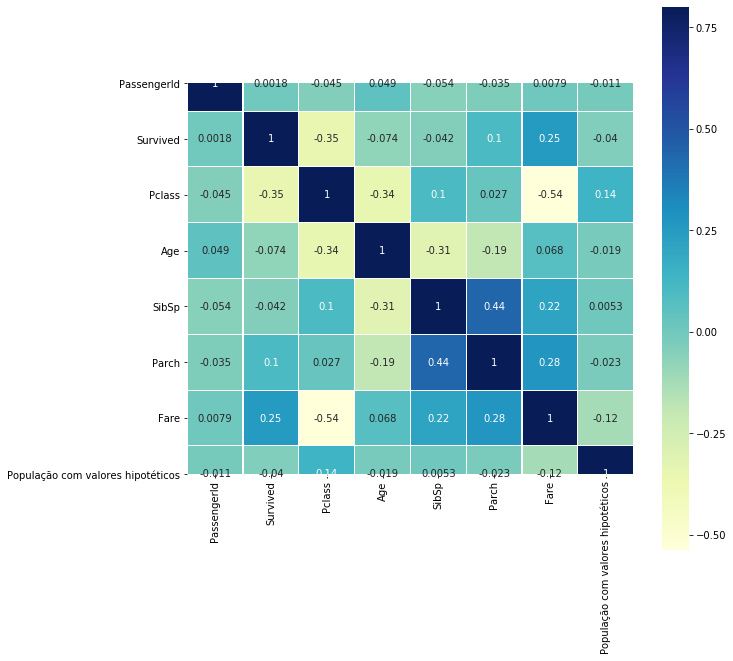

In [60]:


corr=df_final.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
#plt.title('Correlation between features');



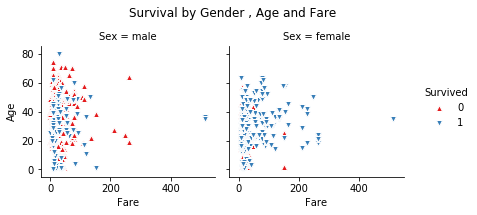

In [66]:
g = sns.FacetGrid(df_final, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');



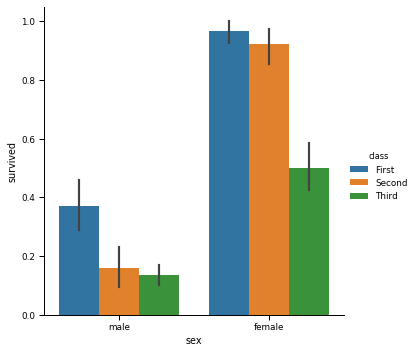

In [70]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);